In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import graphviz
from graphviz import Source
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sn

df_wine = pd.read_csv('winequalityN.csv')

In [2]:
# fill NaN values with mean values
for i in df_wine.columns:
    if df_wine[i].isnull().sum() > 0:
#         print(i)
        df_wine[i] = df_wine[i].fillna(df_wine[i].mean())

In [3]:
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#PCA
y = df_wine.loc[:, 'type'].values
x = StandardScaler().fit_transform(df_wine.iloc[:, 1:12])
print("Before PCA: ",x.shape)

pca = PCA(n_components=5)
X = pca.fit_transform(x)
print("After PCA: ",X.shape)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


Before PCA:  (6497, 11)
After PCA:  (6497, 5)
[0.27542041 0.22670389 0.14132792 0.08830461 0.06546648]
0.797223311927939


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3,random_state =42)
print(X_train.shape)

(4547, 5)


In [6]:
# instantiate a decision tree model.
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, min_samples_leaf = 1, 
                                 min_samples_split = 2, random_state= 42) 
dt.fit(X_train, y_train) # train our model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [7]:
y_pred = dt.predict(X_test)
print(y_pred)
accuracy_score(y_test, y_pred)  

['white' 'white' 'white' ... 'red' 'white' 'red']


0.982051282051282

In [8]:
import time
start_time = time.time()
dt.fit(X_train,y_train)
end_time  = time.time()
print('duration:',end_time-start_time)

duration: 0.02430272102355957


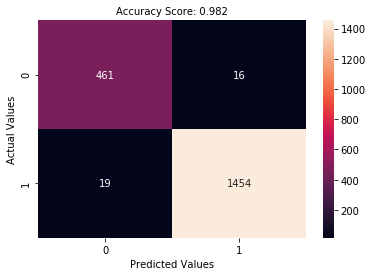

In [9]:
score = round(accuracy_score(y_test, y_pred), 3)

cm = confusion_matrix(y_test, y_pred)

sn.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 10)
plt.show()

In [10]:
# X_train_pca = pca.fit_transform(X_train)
# print(X_train_pca.shape)
# X_test_pca = pca.fit_transform(X_test)
# print(X_test_pca.shape)